In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [3]:
n_samples = 1500
X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)  

In [13]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
distances = np.min(kmeans.transform(X), axis=1)
threshold = np.percentile(distances, 95)
anomalies = distances > threshold

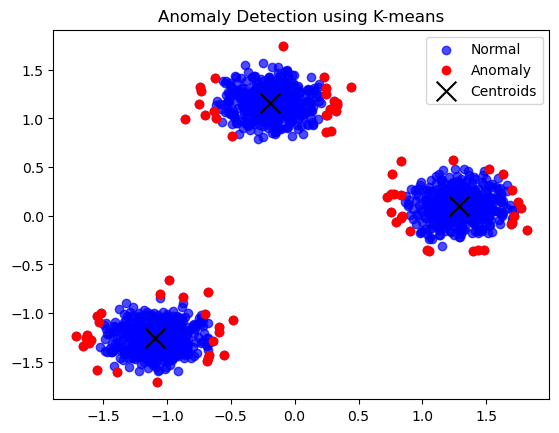

In [15]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal', alpha=0.7)
plt.scatter(X[anomalies, 0], X[anomalies, 1], c='red', label='Anomaly', alpha=1.0)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='x', label='Centroids')
plt.legend()
plt.title('Anomaly Detection using K-means')
plt.show()

In [11]:
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 75
